# **Naive Bayes Method (TP073767)**

## **Import Libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## **Load Dataset**

In [2]:
# Load the KDD Cup 1999 training data
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz"
column_names = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
    "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
    "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
    "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
    "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
    "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label"
]
data = pd.read_csv(url, header=None, names=column_names)

## **Encode Category Columns**

In [3]:
categorical_encoders = {}

categorical_columns = ['protocol_type', 'service', 'flag']

for column_name in categorical_columns:
    encoder = LabelEncoder()
    data[column_name] = encoder.fit_transform(data[column_name])

## **Encode Labels**

In [4]:
data['label'] = data['label'].apply(lambda x: 1 if x == 'normal.' else 0)

X = data.drop(columns=['label'])
y = data['label']

## **Normalize Features**

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Split Data for Train and Test**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Train Model**

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nb_model = GaussianNB(priors = None, var_smoothing=1e-9)

nb_model.fit(X_train, y_train)

GaussianNB()

## **Evaluate Test Data**

In [8]:
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9706406229744806

Confusion Matrix:
 [[779925   5073]
 [ 23690 170999]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    784998
           1       0.97      0.88      0.92    194689

    accuracy                           0.97    979687
   macro avg       0.97      0.94      0.95    979687
weighted avg       0.97      0.97      0.97    979687



## **Confusion Matrix**

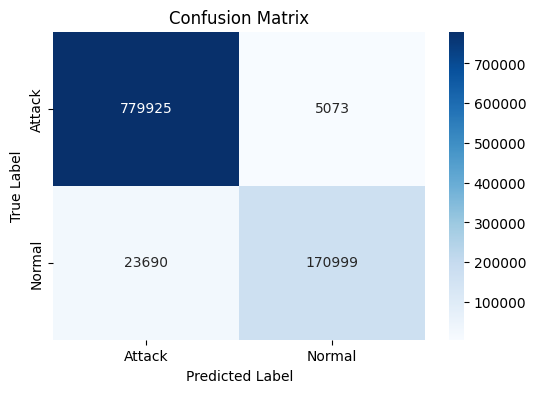

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Attack", "Normal"], yticklabels=["Attack", "Normal"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Neural Network Method (TP074300)**

## **Import the Libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## **Load the Correct Dataset**

In [2]:
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz"
column_names = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
    "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
    "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
    "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
    "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
    "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label"
]
data = pd.read_csv(url, header=None, names=column_names)

## **Encode All Category Columns**

In [3]:
categorical_encoders = {}

categorical_columns = ['protocol_type', 'service', 'flag']

for column_name in categorical_columns:
    encoder = LabelEncoder()
    data[column_name] = encoder.fit_transform(data[column_name])

## **Encode The Labels**

In [4]:
data['label'] = data['label'].apply(lambda x: 1 if x == 'normal.' else 0)

X = data.drop(columns=['label'])
y = data['label']

## **Normalize Features**

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Split Data for Train and Test**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Import Model Library and Set Hyperparameters**

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Train Model**

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=1024,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
3062/3062 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9908 - loss: 0.0368 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 2/10
3062/3062 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9996 - val_loss: 0.0014
Epoch 3/10
3062/3062 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9996 - val_loss: 0.0011
Epoch 4/10
3062/3062 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9997 - val_loss: 0.0010
Epoch 5/10
3062/3062 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9997 - val_loss: 9.0022e-04
Epoch 6/10
3062/3062 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9997 - val_loss: 8.8100e-04
Epoch 7/10
3062/3062 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9998 - val_loss: 9.0443e-04
Epoch 8/10
3062/3062 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.99

## **Evaluate The Model**

In [9]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")

from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9996162056922913
30616/30616 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step
Confusion Matrix:
 [[784777    221]
 [   155 194534]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    784998
           1       1.00      1.00      1.00    194689

    accuracy                           1.00    979687
   macro avg       1.00      1.00      1.00    979687
weighted avg       1.00      1.00      1.00    979687



## **Confusion Matrix**

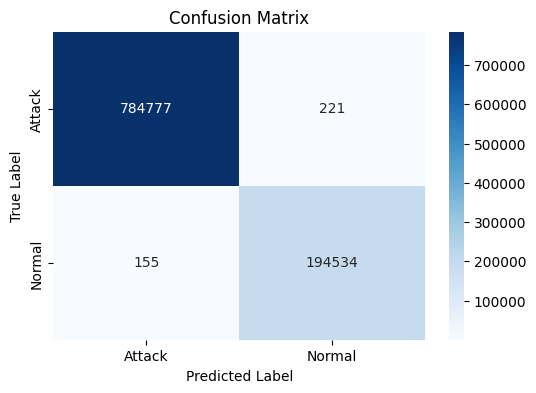

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Attack", "Normal"], yticklabels=["Attack", "Normal"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Logistic Regression Method (TP074301)**

## **Import Data Preprocessing Libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## **Load the KDD Cup 1999 Dataset**

In [2]:
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz"
column_names = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
    "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
    "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
    "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
    "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
    "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label"
]
data = pd.read_csv(url, header=None, names=column_names)

## **Encode Category Columns**

In [3]:
categorical_encoders = {}

categorical_columns = ['protocol_type', 'service', 'flag']

for column_name in categorical_columns:
    encoder = LabelEncoder()
    data[column_name] = encoder.fit_transform(data[column_name])

## **Encode Labels**

In [4]:
data['label'] = data['label'].apply(lambda x: 1 if x == 'normal.' else 0)

X = data.drop(columns=['label'])
y = data['label']

## **Normalize Features**

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Split Data for Train and Test and Set Random State**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Set Model Hyperparameters and Train Model**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## **Evaluate The Model with Test Data**

In [8]:
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9984

Confusion Matrix:
[[783875   1123]
 [   452 194237]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    784998
           1       0.99      1.00      1.00    194689

    accuracy                           1.00    979687
   macro avg       1.00      1.00      1.00    979687
weighted avg       1.00      1.00      1.00    979687



## **Confusion Matrix**

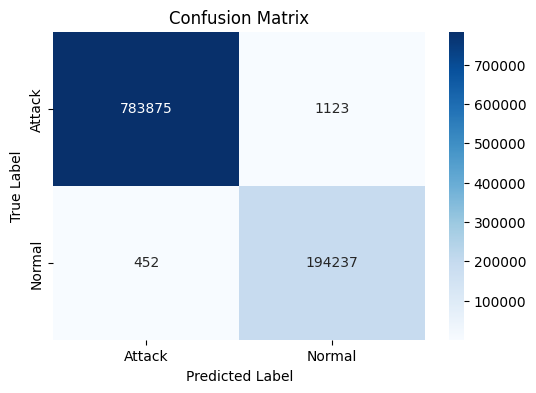

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Attack', 'Normal'], yticklabels=['Attack', 'Normal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **XGBoost Method (TP074553)**

## **Preparing and Loading The Dataset**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the KDD Cup 1999 training data
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz"
kddcup_column_names = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
    "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
    "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
    "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
    "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
    "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label"
]
kddcup_data = pd.read_csv(url, header=None, names=kddcup_column_names)

## **Encoding Categorical Columns**


In [2]:
# Encode categorical columns (protocol_type, service, and flag)
label_encoders = {}
for column in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    kddcup_data[column] = le.fit_transform(kddcup_data[column])
    label_encoders[column] = le

## **Convert The Labels To Binary**


In [3]:
# Convert the outcome labels (normal vs anomaly)
kddcup_data['label'] = kddcup_data['label'].apply(lambda x: 1 if x == 'normal.' else 0)

## **Splitting Data into Features and Target Variable**

In [4]:
# Split into features and target
kddcup_features = kddcup_data.drop(columns=['label'])
kddcup_target = kddcup_data['label']

## **Normalize The Features**

In [5]:
# Normalize features
scaler = StandardScaler()
kddcup_features_scaled = scaler.fit_transform(kddcup_features)

## **Splitting Data into Training and Test Sets**

In [6]:
# Split into training and test sets
kddcup_features_train, kddcup_features_test, kddcup_target_train, kddcup_target_test = train_test_split(kddcup_features_scaled, kddcup_target, test_size=0.2, random_state=6429)

## **Preparing XGBoost and Creating DMatrix**

In [7]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Create DMatrix for XGBoost
kddcup_dtrain = xgb.DMatrix(kddcup_features_train, label=kddcup_target_train)
kddcup_dtest = xgb.DMatrix(kddcup_features_test, label=kddcup_target_test)

## **Set Up Parameters for Classification**

In [8]:
# Set up parameters for binary classification
xgb_params = {
    'objective': 'binary:logistic',  # binary classification
    'eval_metric': 'logloss',        # evaluation metric
    'use_label_encoder': False,
    'seed': 6429
}

## **Train the XGBoost Model**

In [9]:
# Train the XGBoost model
XGBModel = xgb.train(xgb_params, kddcup_dtrain, num_boost_round=100)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:17:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## **Save the XGBoost Model**

In [10]:
import pickle

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(XGBModel, f)

## **Import the XGBoost Model**

In [11]:
with open('xgb_model.pkl', 'rb') as f:
    XGBModel = pickle.load(f)

## **Predict and Evaluate on Test Data**

In [12]:
# Predict on test set
xgb_pred_prob = XGBModel.predict(kddcup_dtest)
xgb_pred = (xgb_pred_prob > 0.5).astype(int)

# Evaluate model performance
print("Accuracy:", accuracy_score(kddcup_target_test, xgb_pred))
print("\nClassification Report:")
print(classification_report(kddcup_target_test, xgb_pred, target_names=['Normal', 'Anomaly']))

Accuracy: 0.9999734609114952

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    785622
     Anomaly       1.00      1.00      1.00    194065

    accuracy                           1.00    979687
   macro avg       1.00      1.00      1.00    979687
weighted avg       1.00      1.00      1.00    979687



## **Calculate Confusion Matrix**

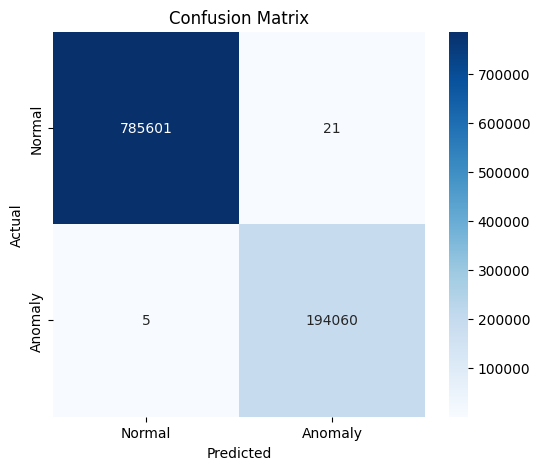

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(kddcup_target_test, xgb_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Calculate ROC and AUC**

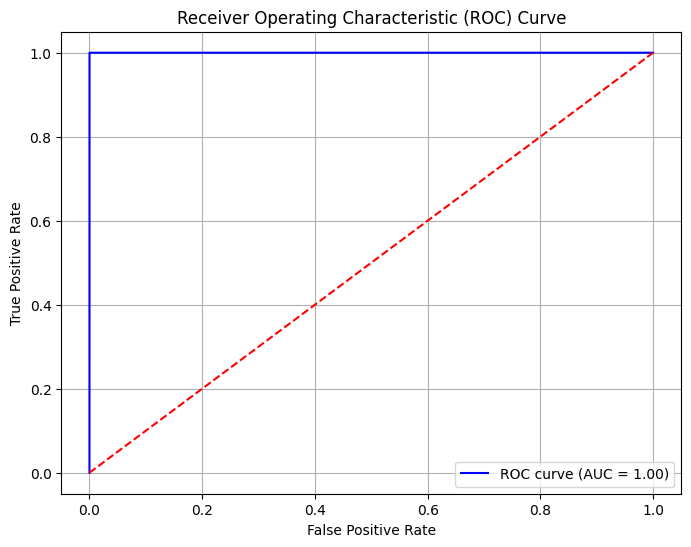

AUC: 1.00


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(kddcup_target_test, xgb_pred_prob)

# Calculate AUC
auc = roc_auc_score(kddcup_target_test, xgb_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # Random guess line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC score
print(f"AUC: {auc:.2f}")